In [2]:
# Import libraries

import math

import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import yfinance as yf
from keras.layers import LSTM, Dense, Dropout, Activation
from keras.models import Sequential
from matplotlib.pyplot import figure
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import scipy.stats as stats

import chart_studio
import chart_studio.plotly as py
import chart_studio.tools as tls

from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score, mean_absolute_error

In [3]:
# Can choose any stock

VGT_df = yf.download('VGT', start = '2014-01-01', end = '2022-04-15', progress = False)

In [4]:
VGT_df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-12-31,89.099998,89.580002,89.080002,89.540001,82.474731,428500
2014-01-02,89.160004,89.160004,88.430000,88.620003,81.627335,358100
2014-01-03,88.760002,88.779999,88.199997,88.320000,81.351006,829500
2014-01-06,88.379997,88.430000,87.820000,88.070000,81.120728,386300
2014-01-07,88.500000,89.099998,88.300003,88.959999,81.940491,317000
...,...,...,...,...,...,...
2022-04-08,401.489990,402.250000,396.660004,397.649994,397.649994,444300
2022-04-11,392.540009,392.880005,387.890015,388.230011,388.230011,499800
2022-04-12,393.980011,396.850006,385.540009,387.170013,387.170013,2719400


<AxesSubplot:>

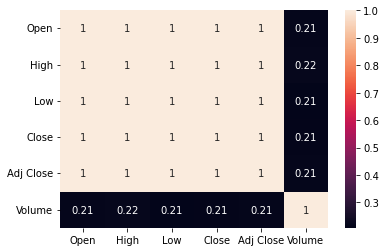

In [5]:
# Check the correlation of the data

sns.heatmap(VGT_df.corr(),annot = True)

In [7]:
fig1 = make_subplots(specs=[[{"secondary_y": True}]])
fig1.add_trace(go.Candlestick(x=VGT_df.index,
                              open=VGT_df['Open'],
                              high=VGT_df['High'],
                              low=VGT_df['Low'],
                              close=VGT_df['Close'],
                              name='Price'))
fig1.add_trace(go.Bar(x=VGT_df.index, y=VGT_df['Volume'], name='Volume',),secondary_y=True)
fig1.update_yaxes(range=[0,7000000],secondary_y=True)
fig1.update_yaxes(visible=False, secondary_y=True)
fig1.update_layout(xaxis_rangeslider_visible=False)  #hide range slider
fig1.update_layout(title={'text':'VGT STOCK', 'x':0.5})
fig1.show()

In [8]:
# Slice Data ot features and label

data = VGT_df[['Close']]


In [10]:
# Convert dataset to numpy array

dataset = data.values

type(dataset)

numpy.ndarray

## Slicing and Scaling of Data

In [11]:
# Slice numbers of row to train model

training_data_len = math.ceil(len(dataset) *.8)

print(training_data_len)

1671


In [12]:
# Scale the data

scaler = MinMaxScaler(feature_range = (0,1))
scaled_data = scaler.fit_transform(dataset)

# scaler = StandardScaler()
# scaled_data = scaler.fit_transform(dataset)

In [13]:
# Create the training data set
# Create the scaled training data set

train_data = scaled_data[0:training_data_len, :]

predict_day = 60

# Split the data into x_train and y_train data sets

x_train = []
y_train = []

for i in range(predict_day, len(train_data)):
    x_train.append(train_data[i-predict_day:i, 0])
    y_train.append(train_data[i, 0])


In [14]:
# Convert the x_train and y_train to numpy arrays

x_train, y_train = np.array(x_train), np.array(y_train)

In [15]:
# Reshape the data
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(1611, 60, 1)

## Building and Training of Model

In [16]:
# Build the LSTM model

model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape= (x_train.shape[1],1)))
model.add(LSTM(50, return_sequences = False))
model.add(Dropout(0.2))
model.add(Dense(1))

In [17]:
# Compile the Model

model.compile(optimizer ='adam', loss = 'mean_squared_error')

# model.compile(optimizer ='adamax', loss = 'mean_squared_error')

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 60, 50)            10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dropout (Dropout)            (None, 50)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 30,651
Trainable params: 30,651
Non-trainable params: 0
_________________________________________________________________


In [19]:
# Train the model

model.fit(x_train,y_train,epochs=20,batch_size=16,verbose=2)

Epoch 1/20
101/101 - 11s - loss: 0.0037
Epoch 2/20
101/101 - 6s - loss: 6.1874e-04
Epoch 3/20
101/101 - 5s - loss: 5.9681e-04
Epoch 4/20
101/101 - 5s - loss: 6.5177e-04
Epoch 5/20
101/101 - 5s - loss: 5.1475e-04
Epoch 6/20
101/101 - 5s - loss: 4.3480e-04
Epoch 7/20
101/101 - 5s - loss: 4.8353e-04
Epoch 8/20
101/101 - 5s - loss: 4.4310e-04
Epoch 9/20
101/101 - 5s - loss: 4.0321e-04
Epoch 10/20
101/101 - 5s - loss: 3.6442e-04
Epoch 11/20
101/101 - 5s - loss: 3.6363e-04
Epoch 12/20
101/101 - 5s - loss: 3.7843e-04
Epoch 13/20
101/101 - 5s - loss: 3.5167e-04
Epoch 14/20
101/101 - 5s - loss: 3.6993e-04
Epoch 15/20
101/101 - 5s - loss: 2.8621e-04
Epoch 16/20
101/101 - 5s - loss: 2.6465e-04
Epoch 17/20
101/101 - 5s - loss: 3.2877e-04
Epoch 18/20
101/101 - 5s - loss: 3.0460e-04
Epoch 19/20
101/101 - 5s - loss: 2.7734e-04
Epoch 20/20
101/101 - 5s - loss: 2.5454e-04


# Predicting Model

In [20]:
# Create the testing data set
# Create a new array containing scaled value 
test_data = scaled_data[training_data_len - predict_day:, :]

# Create the data sets x_test , y_test
x_test = []
y_test = scaled_data[training_data_len:, :]

for i in range (predict_day, len(test_data)):
    x_test.append(test_data[i-predict_day:i, 0])

In [21]:
# Convert the data to a numoy array
x_test = np.array(x_test)

In [22]:
# Reshape the data

x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [23]:
# Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)


In [24]:
y_test = scaler.inverse_transform(y_test)

## Evaluation of the Error

In [25]:
# Get Root Mean Squared Error (RMSE)

MSE = mean_squared_error(y_test, predictions)
MSE


72.84428437472025

In [26]:
RSME = math.sqrt(MSE)
RSME

8.53488631293471

In [27]:
# Get Mean Abolute Percentage Error (MAPE)

mape = mean_absolute_percentage_error(y_test, predictions)
mape

0.0172553235346167

In [28]:
# Get R2

r2 = r2_score(y_test, predictions)
r2

0.960359536493796

In [29]:
# Get Adjected R2


Adj_r2 = 1 - ((1-r2 )* (len(x_test)-1)/(len(x_test)-x_test.shape[1]-1))
Adj_r2

0.9536785594983683

In [30]:
# Get Mean Absolute Error (MAE)

mae = mean_absolute_error(y_test, predictions)
mae

6.517340351351731

## Ploting of Prediction

In [31]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

C:\Users\Gray Kang\AppData\Local\Temp\ipykernel_20768\2657761684.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [35]:
fig4 = make_subplots(specs=[[{"secondary_y": False}]])
# fig5.add_trace(go.Scatter(x=train.index,y=train['Close'],name='Train'),secondary_y=False)
fig4.add_trace(go.Scatter(x=valid.index,y=valid['Close'],name='Actual'),secondary_y=False)
fig4.add_trace(go.Scatter(x=valid.index,y=valid['Predictions'],name='Predictions'),secondary_y=False)

fig4.update_layout(title={'text':'VGT Prediction MinMax', 'x':0.5})
fig4.show()

## Ploting of shift T-5 

In [36]:
valid['Prediction-5'] = valid.Predictions.shift(-5)
valid.dropna(inplace = True)
valid

C:\Users\Gray Kang\AppData\Local\Temp\ipykernel_20768\1922983855.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Gray Kang\AppData\Local\Temp\ipykernel_20768\1922983855.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Close,Predictions,Prediction-5
Date,,,
2020-08-20,310.359985,306.549530,316.466370
2020-08-21,313.589996,307.445801,319.589172
2020-08-24,316.140015,308.976074,322.776184
2020-08-25,317.649994,311.033142,325.704132
2020-08-26,324.220001,313.341888,329.253326
...,...,...,...
2022-04-01,415.260010,427.245758,413.738037
2022-04-04,423.429993,426.176178,408.013947
2022-04-05,413.420013,425.555481,401.187134


In [37]:
fig5 = make_subplots(specs=[[{"secondary_y": False}]])
# fig5.add_trace(go.Scatter(x=train.index,y=train['Close'],name='Train'),secondary_y=False)
fig5.add_trace(go.Scatter(x=valid.index,y=valid['Close'],name='Actual'),secondary_y=False)
fig5.add_trace(go.Scatter(x=valid.index,y=valid['Prediction-5'],name='Predictions'),secondary_y=False)

fig5.update_layout(title={'text':'VGT Prediction MinMax T-5', 'x':0.5})
fig5.show()

In [39]:
valid['Percent.dff(%)'] = (abs(valid['Predictions']-valid['Close'])/valid['Close'])*100

C:\Users\Gray Kang\AppData\Local\Temp\ipykernel_20768\3104676299.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [41]:
Avg_diff = valid["Percent.dff(%)"].mean()
Avg_diff

1.7113447096438805

In [42]:
valid["Percent.dff(%)"].max() / 100

0.10420870421090411

In [43]:
valid["Percent.dff(%)"].min() / 100

3.087220189205879e-05

## Forcasting for 30 Unknown Days

In [44]:
len(test_data)

477

In [45]:
x_input=test_data[417:].reshape(1,-1)
x_input.shape

(1, 60)

In [46]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [47]:
lst_output=[]
n_steps=60
i=1
while(i<=30):
    
    if(len(temp_input)>60):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        #print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        # print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        #print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        #print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1



lst_output = scaler.inverse_transform(lst_output)

print(lst_output)

[[385.86968067]
 [382.79595589]
 [380.38825358]
 [378.43800223]
 [376.83158198]
 [375.50366537]
 [374.41453421]
 [373.53690069]
 [372.84973753]
 [372.33480748]
 [371.97523428]
 [371.75441387]
 [371.65644537]
 [371.66588156]
 [371.76784229]
 [371.94821865]
 [372.1941493 ]
 [372.49322655]
 [372.83453982]
 [373.207859  ]
 [373.60447377]
 [374.01655845]
 [374.43724004]
 [374.86057555]
 [375.28182422]
 [375.69674429]
 [376.1020467 ]
 [376.49528169]
 [376.87429434]
 [377.2378144 ]]


## Ploting of forcasting 30 Days

In [48]:
day_new=np.arange(1,61)
day_pred=np.arange(61,91)

In [50]:
lst_output = lst_output.reshape(-1)

lst_output.shape

(30,)

In [51]:
df1 = data.reset_index()['Close']

In [52]:
series = pd.Series(lst_output)

In [53]:
df1 = df1.append(series)

C:\Users\Gray Kang\AppData\Local\Temp\ipykernel_20768\2778477502.py:1: FutureWarning:

The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [54]:
fig6 = make_subplots(specs=[[{"secondary_y": True}]])
fig6.add_trace(go.Scatter(x=day_new,y=df1[2027:2087],name='Actual'),secondary_y= False)
fig6.add_trace(go.Scatter(x=day_pred,y=df1[2087:],name='30 Day Forecast'),secondary_y=False)

fig6.update_layout(title={'text':'VGT 30 Day Forecast', 'x':0.5})
fig6.show()

In [70]:
# new dataset to plot the forecast plot

df_later = yf.download('VGT', start = '2022-04-17' , end = '2022-05-06', progress = False)

In [58]:
fig7 = make_subplots(specs=[[{"secondary_y": True}]])
fig7.add_trace(go.Scatter(x=df_later.index,y=df_later['Close'],name='Actual'),secondary_y= False)
fig7.add_trace(go.Scatter(x=df_later.index,y=df1[2087:2096],name='10 Day Forecast'),secondary_y=False)

fig7.update_layout(title={'text':'VGT 10 Day Forecast', 'x':0.5})
fig7.show()

In [75]:
fig8 = make_subplots(specs=[[{"secondary_y": True}]])
fig8.add_trace(go.Scatter(x=day_pred,y=df_later['Close'],name='Actual'),secondary_y= False)
fig8.add_trace(go.Scatter(x=day_pred,y=df1[2087:],name='30 Day Forecast'),secondary_y=False)

fig8.update_layout(title={'text':'VGT 30 Day Forecast', 'x':0.5})